In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load the dataset
df = pd.read_excel("/content/Data_Train.xlsx")

In [ ]:
# Convert Date_of_Journey into day, month, and year
df["Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df["Year"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [ ]:
# Convert Dep_Time and Arrival_Time into hours and minutes
# Assuming 'Dep_Time' is in the format 'HH:MM'
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"], format='%H:%M', errors='coerce').dt.hour
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"], format='%H:%M', errors='coerce').dt.minute



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
 14  Dep_Hour         10683 non-null  int32 
 15  Dep_Min          10683 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [ ]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"], format='%H:%M:%S', errors='coerce').dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"], format='%H:%M:%S', errors='coerce').dt.minute

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
# Convert Duration to total minutes
def convert_duration(duration):
    duration = duration.split()
    total_minutes = 0
    for part in duration:
        if "h" in part:
            total_minutes += int(part.replace("h", "")) * 60
        elif "m" in part:
            total_minutes += int(part.replace("m", ""))
    return total_minutes

df["Duration_Minutes"] = df["Duration"].apply(convert_duration)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64


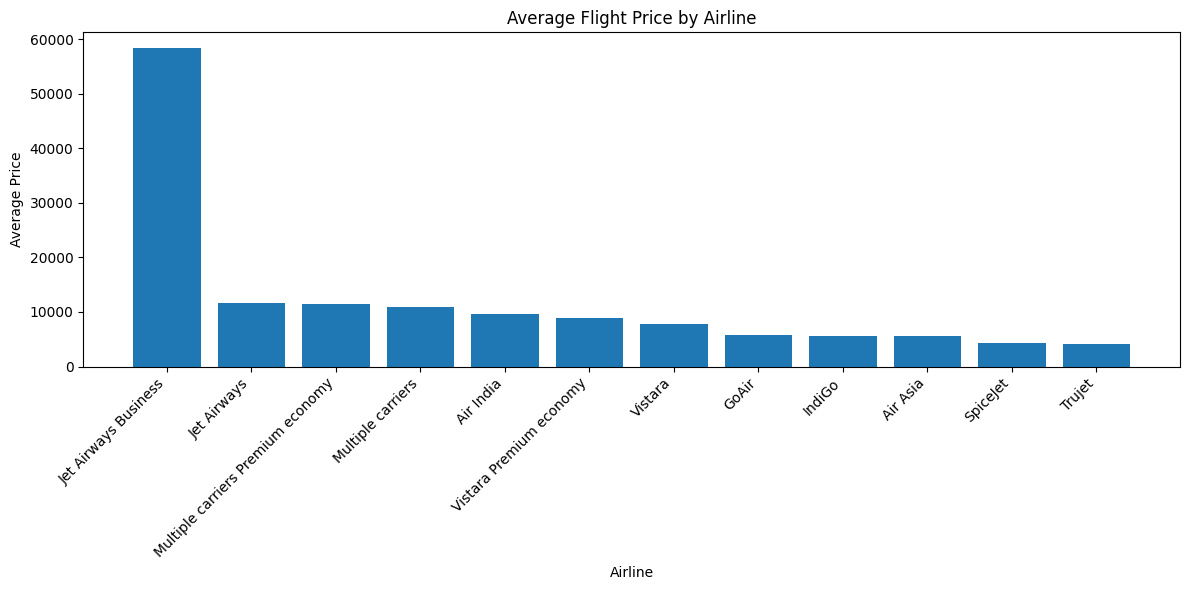

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to prepare the DataFrame) ...

# Group by Airline and compute average price
avg_price_airline = df.groupby("Airline")["Price"].mean().sort_values(ascending=False)
print(avg_price_airline)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(avg_price_airline.index, avg_price_airline.values)
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.title("Average Flight Price by Airline")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Airline
Vistara Premium economy              153.333333
SpiceJet                             178.484108
Trujet                               195.000000
IndiGo                               285.406722
GoAir                                298.969072
Air Asia                             348.275862
Jet Airways Business                 386.666667
Vistara                              598.413361
Multiple carriers Premium economy    606.538462
Multiple carriers                    625.769231
Jet Airways                          849.733697
Air India                            943.253425
Name: Duration_Minutes, dtype: float64


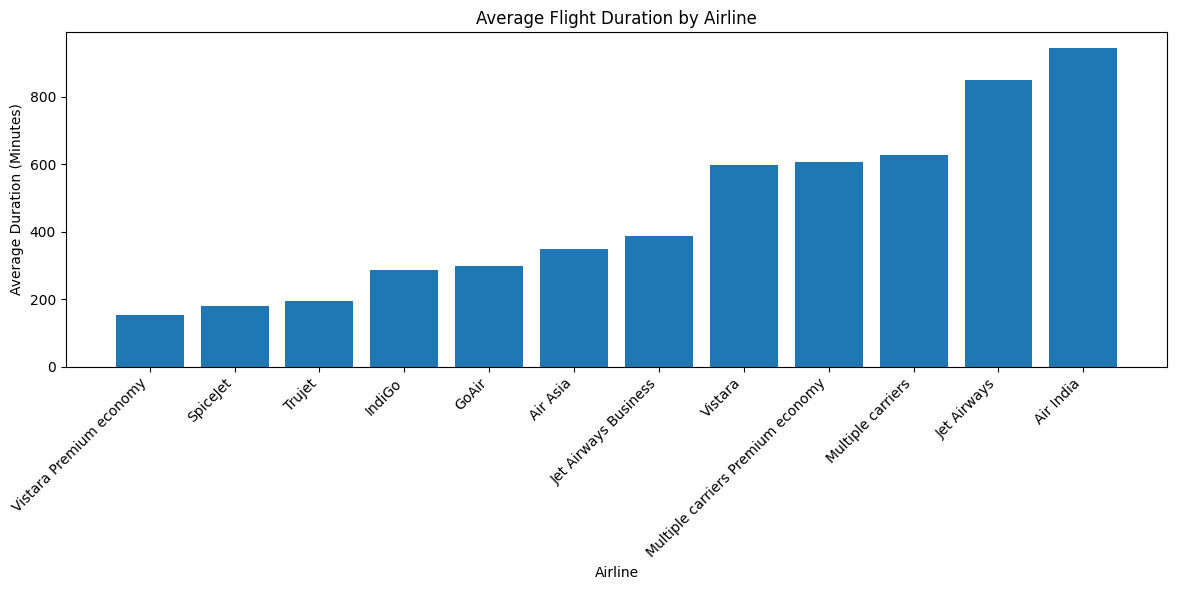

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to prepare the DataFrame) ...

# Group by Airline and compute average duration
avg_duration_airline = df.groupby("Airline")["Duration_Minutes"].mean().sort_values()
print(avg_duration_airline)

# Create a bar plot for average duration
plt.figure(figsize=(12, 6))
plt.bar(avg_duration_airline.index, avg_duration_airline.values)
plt.xlabel("Airline")
plt.ylabel("Average Duration (Minutes)")
plt.title("Average Flight Duration by Airline")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

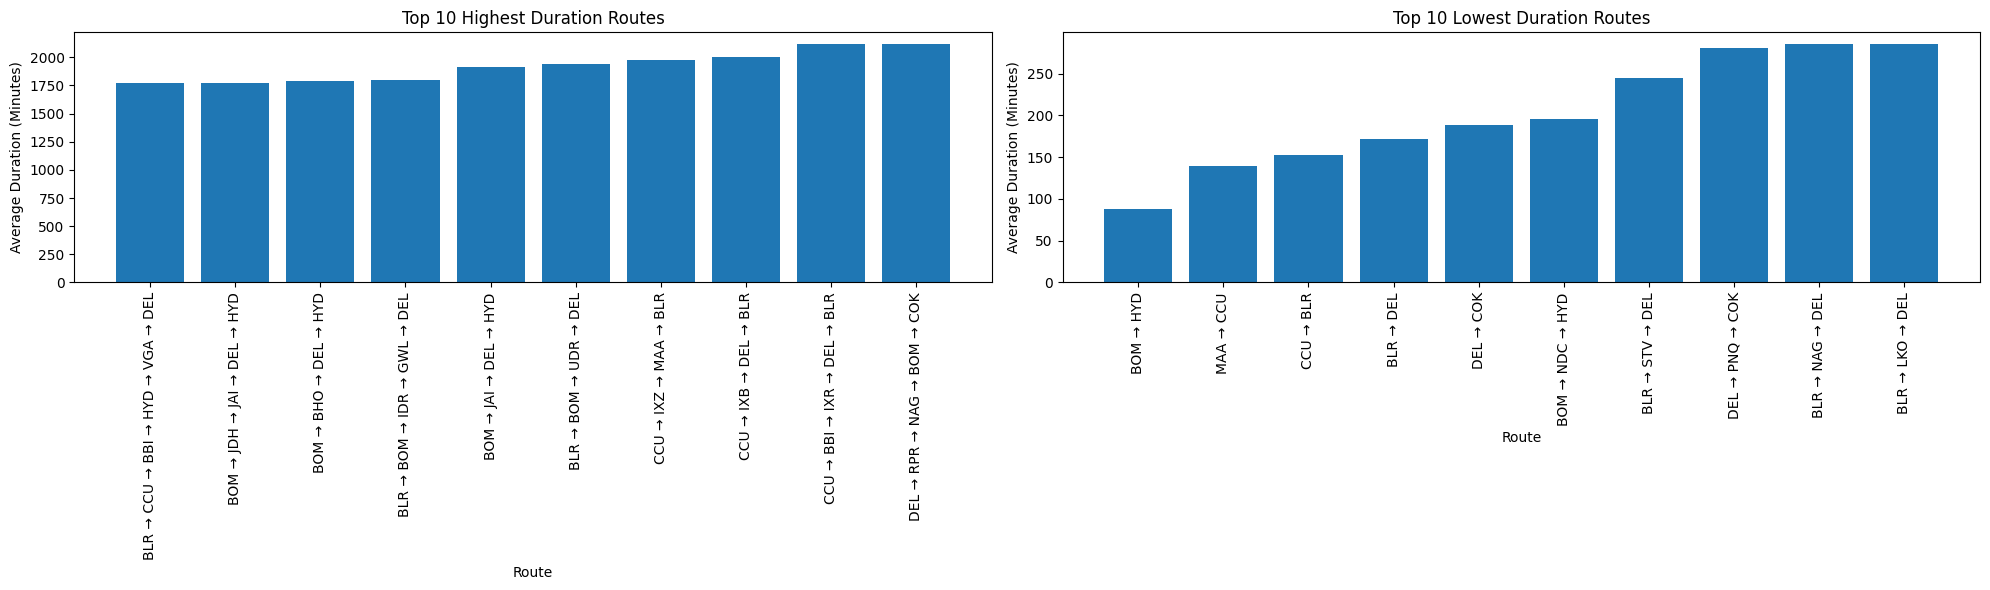

In [ ]:


# Group by Route and compute average duration
avg_duration_route = df.groupby("Route")["Duration_Minutes"].mean().sort_values()

# Get top 10 highest and lowest duration routes
top_10_highest = avg_duration_route.tail(10)
top_10_lowest = avg_duration_route.head(10)

# Create subplots for highest and lowest duration routes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size as needed

# Plot for top 10 highest duration routes
axes[0].bar(top_10_highest.index, top_10_highest.values)
axes[0].set_xlabel("Route")
axes[0].set_ylabel("Average Duration (Minutes)")
axes[0].set_title("Top 10 Highest Duration Routes")
axes[0].tick_params(axis='x', rotation=90)

# Plot for top 10 lowest duration routes
axes[1].bar(top_10_lowest.index, top_10_lowest.values)
axes[1].set_xlabel("Route")
axes[1].set_ylabel("Average Duration (Minutes)")
axes[1].set_title("Top 10 Lowest Duration Routes")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64


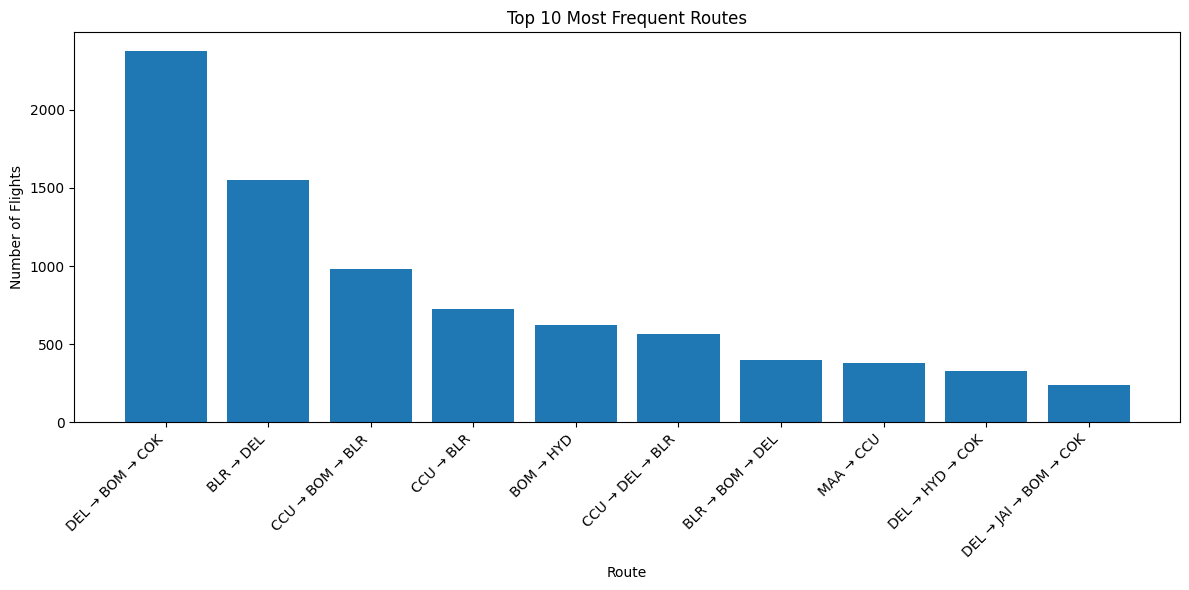

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to prepare the DataFrame) ...

# Count occurrences of each route
route_counts = df["Route"].value_counts().head(10)
print(route_counts)

# Create a bar plot for route counts
plt.figure(figsize=(12, 6))
plt.bar(route_counts.index, route_counts.values)
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.title("Top 10 Most Frequent Routes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

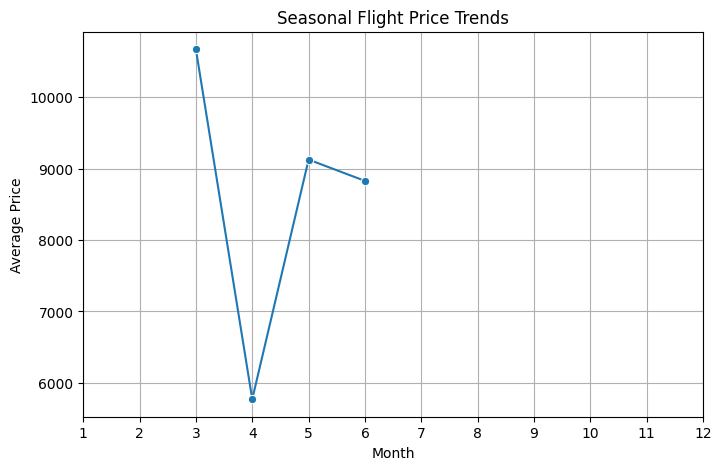

In [ ]:
# Average price per month
monthly_trends = df.groupby("Month")["Price"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker="o")
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Seasonal Flight Price Trends")
plt.grid()
plt.show()

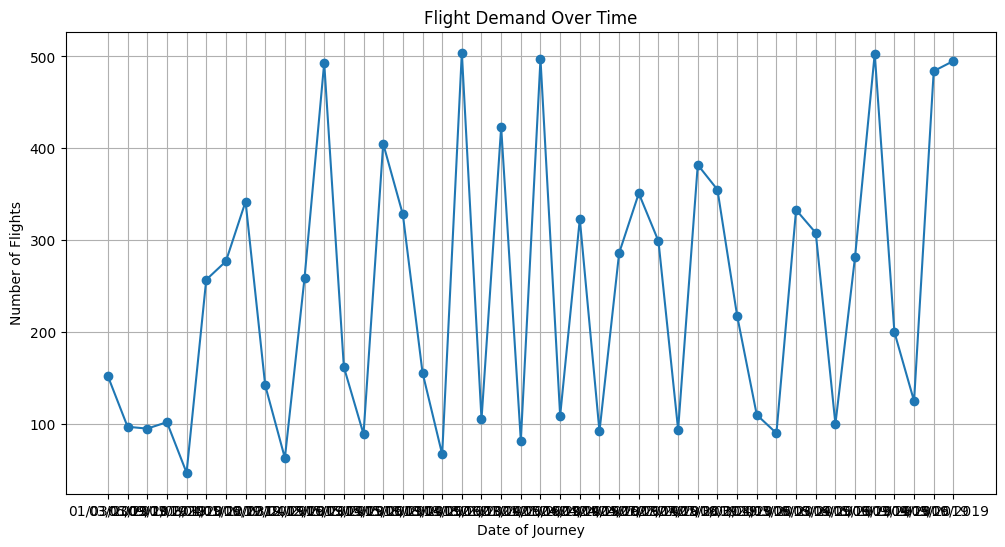

In [ ]:
# Aggregate flight counts by date
demand_trend = df.groupby("Date_of_Journey").size()

# Plot demand trends
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(demand_trend, marker='o', linestyle='-')
plt.xlabel("Date of Journey")
plt.ylabel("Number of Flights")
plt.title("Flight Demand Over Time")
plt.grid()
plt.show()

<ipython-input-84-e017db25f31a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_elasticity = df.groupby("Price_Bin").size()


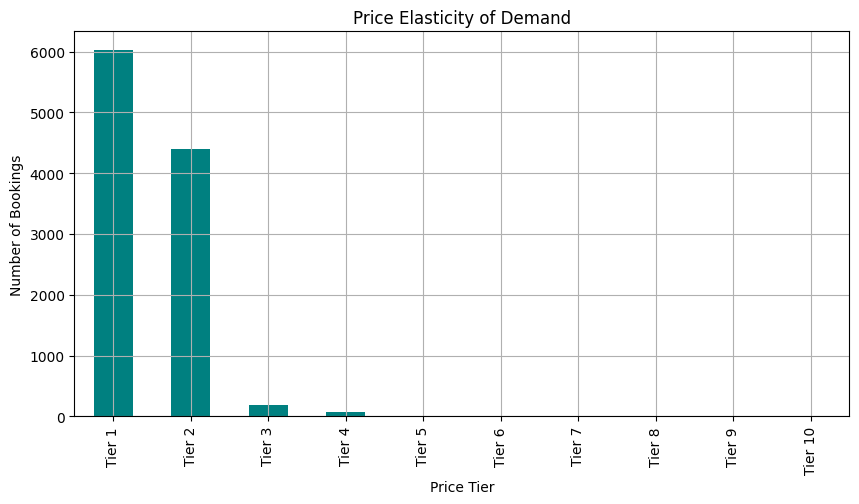

In [ ]:
import numpy as np

# Create price bins
df["Price_Bin"] = pd.cut(df["Price"], bins=10, labels=[f"Tier {i}" for i in range(1, 11)])

# Compute demand for each price tier
price_elasticity = df.groupby("Price_Bin").size()

# Plot demand vs price
plt.figure(figsize=(10,5))
price_elasticity.plot(kind="bar", color="teal")
plt.xlabel("Price Tier")
plt.ylabel("Number of Bookings")
plt.title("Price Elasticity of Demand")
plt.grid()
plt.show()


Route
DEL → BOM → COK          26027193
CCU → BOM → BLR          11246545
BLR → DEL                 8630850
BLR → BOM → DEL           6320716
CCU → DEL → BLR           6081241
CCU → BLR                 3298584
DEL → JAI → BOM → COK     2942817
DEL → AMD → BOM → COK     2611774
BOM → HYD                 2442275
DEL → HYD → COK           2379582
Name: Price, dtype: int64


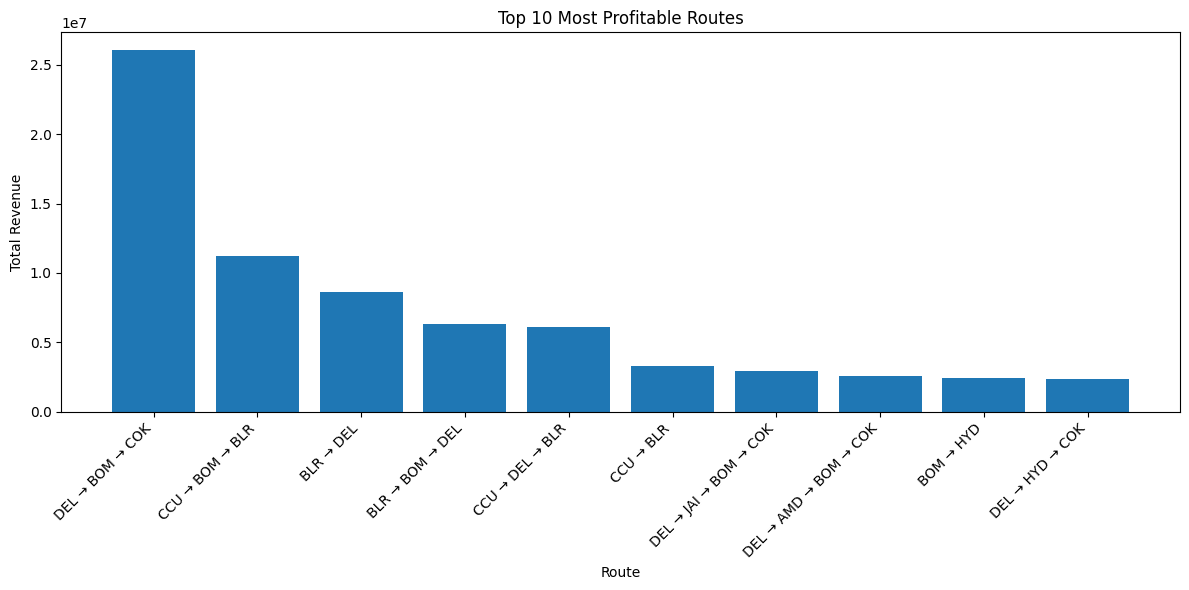

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate revenue per route
route_revenue = df.groupby("Route")["Price"].sum().sort_values(ascending=False)

print(route_revenue.head(10))  # Top 10 Most Profitable Routes

# Create a bar plot for top 10 profitable routes
plt.figure(figsize=(12, 6))
plt.bar(route_revenue.head(10).index, route_revenue.head(10).values)
plt.xlabel("Route")
plt.ylabel("Total Revenue")
plt.title("Top 10 Most Profitable Routes")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-90-f427b95ae44f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_market_share.index, y=airline_market_share.values, palette="coolwarm")


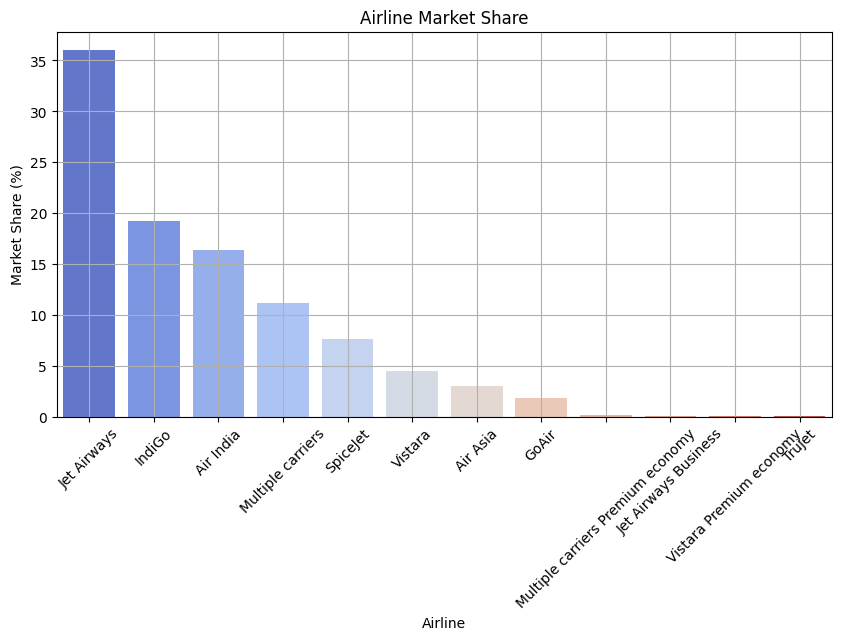

In [ ]:
import seaborn as sns

# Count number of flights per airline
airline_market_share = df["Airline"].value_counts(normalize=True) * 100

# Plot market share
plt.figure(figsize=(10,5))
sns.barplot(x=airline_market_share.index, y=airline_market_share.values, palette="coolwarm")
plt.xlabel("Airline")
plt.ylabel("Market Share (%)")
plt.title("Airline Market Share")
plt.xticks(rotation=45)
plt.grid()
plt.show()


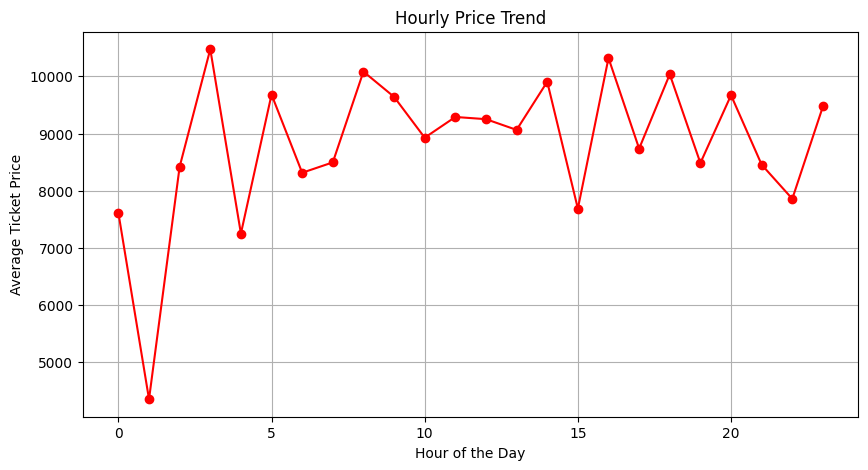

In [ ]:
# Compute average price per hour
hourly_price_trend = df.groupby("Dep_Hour")["Price"].mean()

# Plot trend
plt.figure(figsize=(10,5))
hourly_price_trend.plot(kind="line", marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Ticket Price")
plt.title("Hourly Price Trend")
plt.grid()
plt.show()


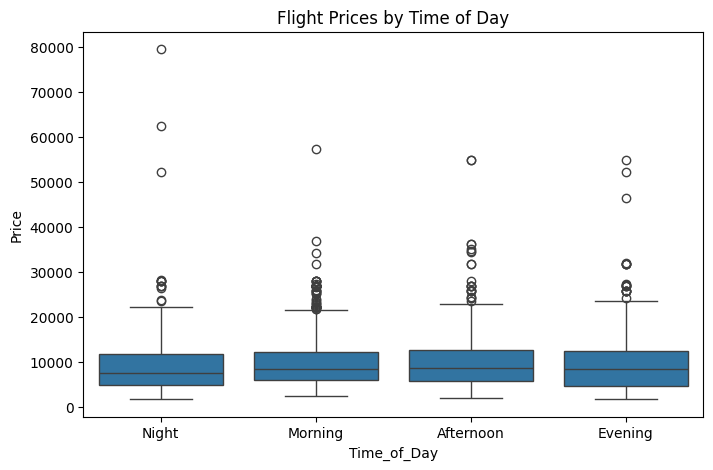

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize departure time
df["Time_of_Day"] = pd.cut(df["Dep_Hour"], bins=[0,6,12,18,24], labels=["Night", "Morning", "Afternoon", "Evening"])

# Plot average price by time of day
plt.figure(figsize=(8,5))
sns.boxplot(x="Time_of_Day", y="Price", data=df)
plt.title("Flight Prices by Time of Day")
plt.show()

<ipython-input-36-87629222bde0>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


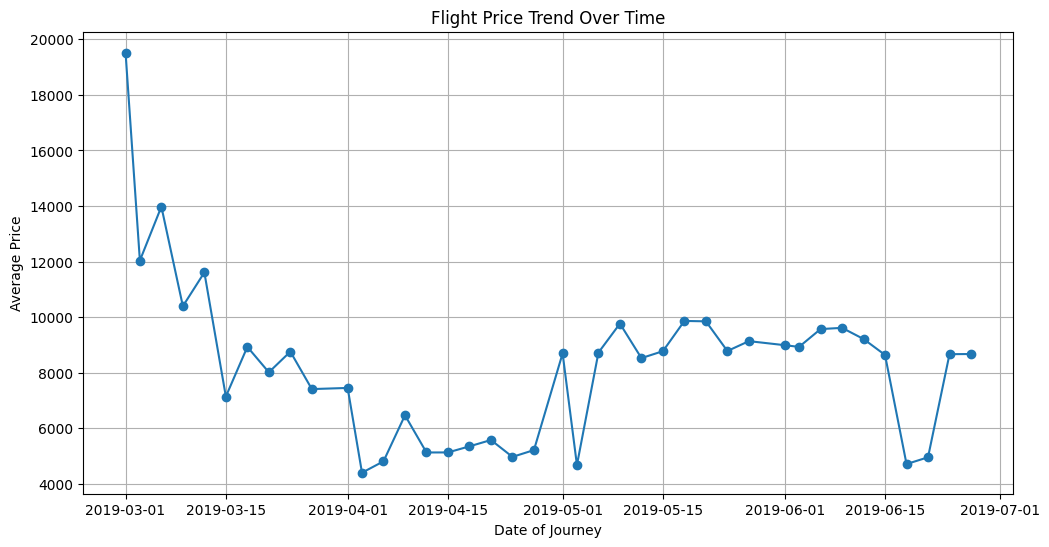

In [ ]:
# Convert Date_of_Journey to datetime
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

# Group by Date and compute average price
price_trend = df.groupby("Date_of_Journey")["Price"].mean()

# Plot price trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(price_trend, marker='o')
plt.xlabel("Date of Journey")
plt.ylabel("Average Price")
plt.title("Flight Price Trend Over Time")
plt.grid()
plt.show()

Total_Stops
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64


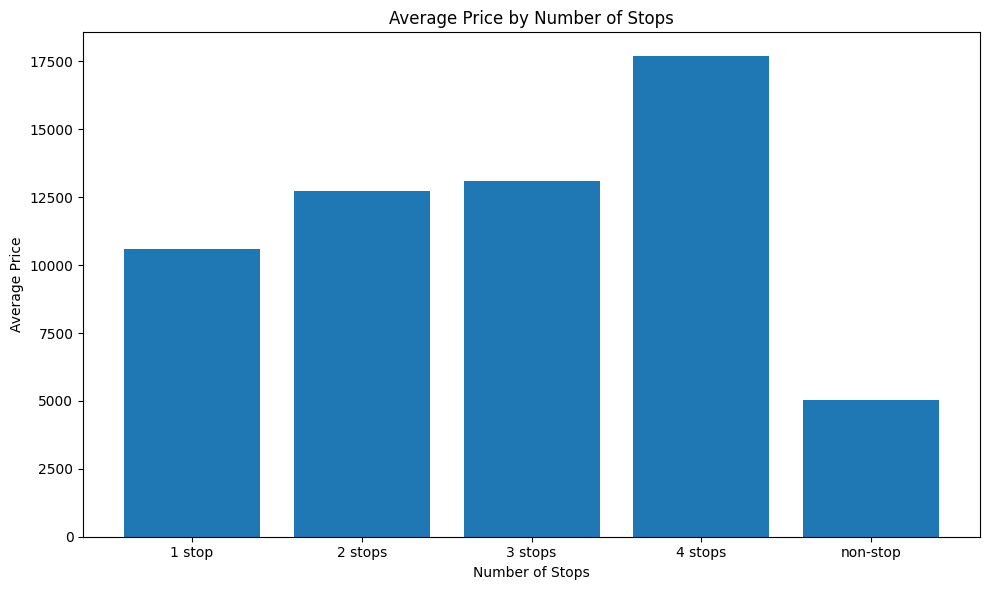

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by number of stops and compute average price
stopwise_price = df.groupby("Total_Stops")["Price"].mean()
print(stopwise_price)

# Create a bar plot for average price by number of stops
plt.figure(figsize=(10, 6))
plt.bar(stopwise_price.index, stopwise_price.values)
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.title("Average Price by Number of Stops")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

Top Departure Cities:
 Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Top Arrival Cities:
 Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


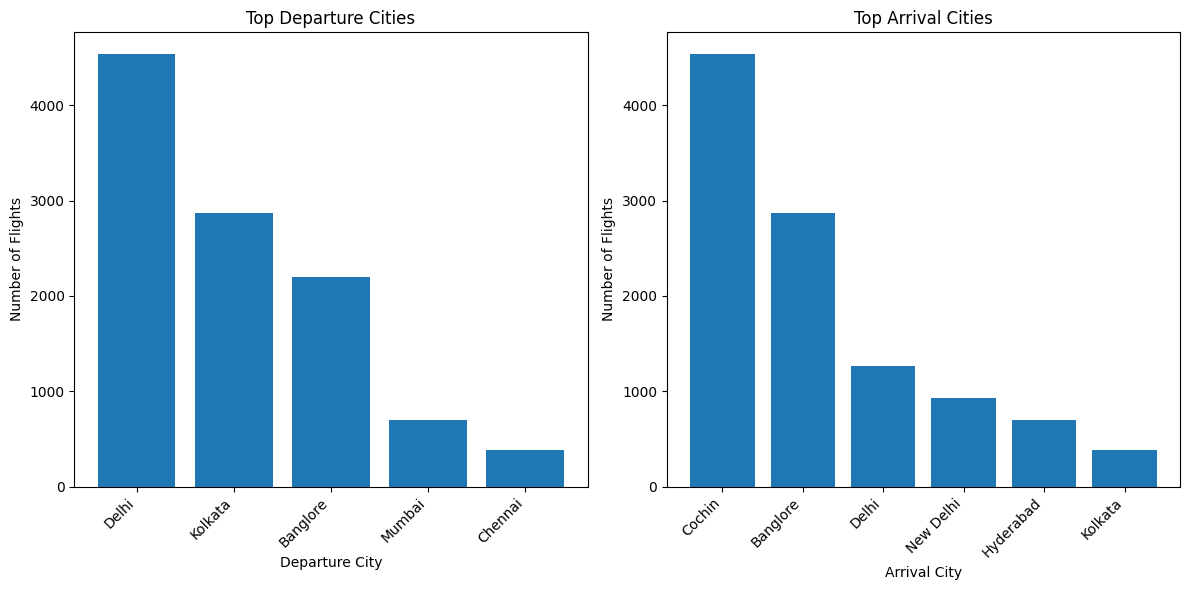

In [ ]:

# Count frequency of each Source & Destination
top_sources = df["Source"].value_counts()
top_destinations = df["Destination"].value_counts()

print("Top Departure Cities:\n", top_sources)
print("\nTop Arrival Cities:\n", top_destinations)

# Create bar plots for top departure and arrival cities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create subplot for departure cities
plt.bar(top_sources.index, top_sources.values)
plt.xlabel("Departure City")
plt.ylabel("Number of Flights")
plt.title("Top Departure Cities")
plt.xticks(rotation=45, ha="right")

plt.subplot(1, 2, 2)  # Create subplot for arrival cities
plt.bar(top_destinations.index, top_destinations.values)
plt.xlabel("Arrival City")
plt.ylabel("Number of Flights")
plt.title("Top Arrival Cities")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [ ]:
# Encode categorical features
label_encoders = {}
for col in ["Airline", "Source", "Destination", "Total_Stops", "Additional_Info"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Drop unnecessary columns
df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time", "Duration", "Route"], axis=1, inplace=True)

# Define features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 671.25
RMSE: 1700.02
R² Score: 0.86


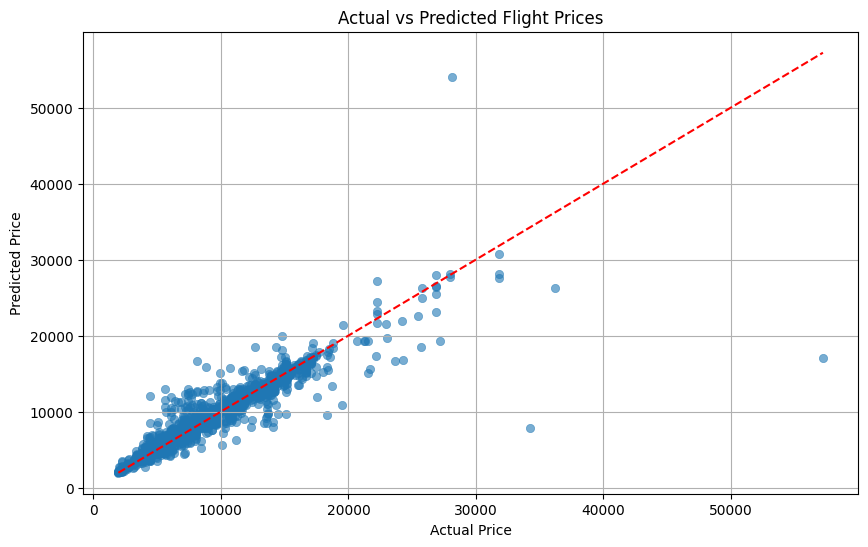

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted Prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')  # Diagonal Line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.grid()
plt.show()


Duration_Minutes    0.465131
Airline             0.132799
Day                 0.098990
Additional_Info     0.072271
Total_Stops         0.044919
Month               0.044451
Destination         0.035884
Dep_Hour            0.029780
Arrival_Hour        0.024739
Dep_Min             0.022398
Arrival_Min         0.020301
Source              0.008337
Year                0.000000
dtype: float64


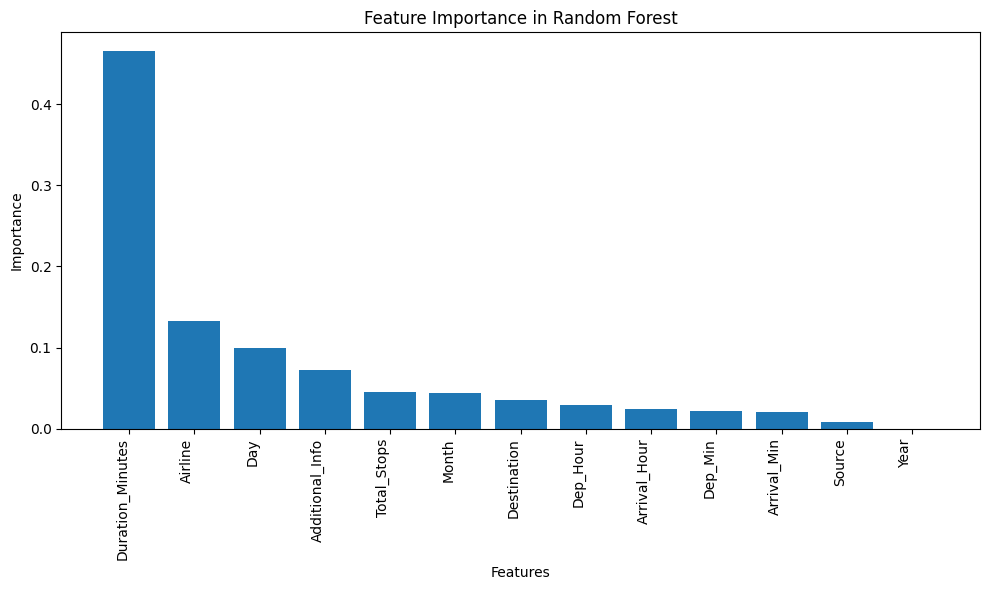

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances.index, importances.values)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the test dataset
test_df = pd.read_excel("/content/Test_set.xlsx")


In [ ]:
# Convert Date_of_Journey into day, month, and year for the test_df
test_df["Day"] = pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_df["Month"] = pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.month
test_df["Year"] = pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [ ]:
# Convert Dep_Time and Arrival_Time into hours and minutes
# Assuming 'Dep_Time' is in the format 'HH:MM'
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"], format='%H:%M', errors='coerce').dt.hour
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"], format='%H:%M', errors='coerce').dt.minute
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"], format='%H:%M:%S', errors='coerce').dt.hour
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"], format='%H:%M:%S', errors='coerce').dt.minute

In [ ]:
# Convert Duration to total minutes
def convert_duration(duration):
    duration = duration.split()
    total_minutes = 0
    for part in duration:
        if "h" in part:
            total_minutes += int(part.replace("h", "")) * 60
        elif "m" in part:
            total_minutes += int(part.replace("m", ""))
    return total_minutes

test_df["Duration_Minutes"] = test_df["Duration"].apply(convert_duration)

# Encode categorical features using the same LabelEncoders from training
for col in ["Airline", "Source", "Destination", "Total_Stops", "Additional_Info"]:
    test_df[col] = label_encoders[col].transform(test_df[col])  # Use previously trained encoders

# Drop unnecessary columns
test_df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time", "Duration", "Route"], axis=1, inplace=True)

# Predict flight prices using trained RandomForest model
test_df["Predicted_Price"] = rf.predict(test_df)

# Save the updated dataset with predicted prices
test_df.to_csv("test_dataset_with_predictions.csv", index=False)

print("✅ Updated test dataset saved as 'test_dataset_with_predictions.csv'")

✅ Updated test dataset saved as 'test_dataset_with_predictions.csv'
